In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Useful Modules

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import pylab
import numpy as np

In [ ]:
# Functions useful for Splitting & Normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# Functions for Regression modeling 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Regression Error Metrics - scikit-learn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Regression Error Metrics 
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.eval_measures import meanabs

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Reading Dataset

In [ ]:
holiday = pd.read_csv('/content/drive/MyDrive/dataset/store-sales-time-series-forecasting/holidays_events.csv')
oil =  pd.read_csv('/content/drive/MyDrive/dataset/store-sales-time-series-forecasting/oil.csv')
stores = pd.read_csv('/content/drive/MyDrive/dataset/store-sales-time-series-forecasting/stores.csv')
transactions = pd.read_csv('/content/drive/MyDrive/dataset/store-sales-time-series-forecasting/transactions.csv')
train = pd.read_csv('/content/drive/MyDrive/dataset/store-sales-time-series-forecasting/train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/store-sales-time-series-forecasting/test.csv')

In [ ]:
holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


###Checking Null values

In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [ ]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [ ]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [ ]:
holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
holiday.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

### Imputing null values
* Oil data frame has 43 nan values. 

In [ ]:
oil = oil.interpolate()
oil = oil.fillna(method='bfill')

### Merging the train,oil,holiday,transactions and stores data frames.

In [ ]:
df_1 = pd.merge(train,oil,on = 'date',how = 'left')
df_2 = pd.merge(df_1,holiday,on = 'date', how = 'left')
df_3 = pd.merge(df_2,stores, on = 'store_nbr', how = 'left')
df = pd.merge(df_3,transactions, on = ['date','store_nbr'], how = 'left')

### Removing few features

In [ ]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,93.14,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN


In [ ]:
df=df.drop(['id','locale_name','description','transferred','locale','state','type_y','cluster'],axis=1)

In [ ]:
df.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,city,transactions
0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14,Holiday,Quito,NaN
1,2013-01-01,1,BABY CARE,0.0,0,93.14,Holiday,Quito,NaN
2,2013-01-01,1,BEAUTY,0.0,0,93.14,Holiday,Quito,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,93.14,Holiday,Quito,NaN
4,2013-01-01,1,BOOKS,0.0,0,93.14,Holiday,Quito,NaN


### Creating day, month and year columns from date column 

In [ ]:
df['date']=df['date'].apply(pd.to_datetime)
df['month']=df['date'].dt.strftime('%m')
df['year']=df['date'].dt.strftime('%Y')
df['day']=df['date'].dt.strftime('%d')
df=df.drop(['date'],axis=1)


In [ ]:
df.head()

,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,city,transactions,month,year,day
0,1,AUTOMOTIVE,0.0,0,93.14,Holiday,Quito,NaN,01,2013,01
1,1,BABY CARE,0.0,0,93.14,Holiday,Quito,NaN,01,2013,01
2,1,BEAUTY,0.0,0,93.14,Holiday,Quito,NaN,01,2013,01
3,1,BEVERAGES,0.0,0,93.14,Holiday,Quito,NaN,01,2013,01
4,1,BOOKS,0.0,0,93.14,Holiday,Quito,NaN,01,2013,01


### Checking for null values

In [ ]:
df.isnull().sum()

store_nbr             0
family                0
sales                 0
onpromotion           0
dcoilwtico       878526
type_x          2551824
city                  0
transactions     249117
month                 0
year                  0
day                   0
dtype: int64

In [ ]:
df= df.interpolate()
df= df.fillna(method='bfill')

In [ ]:
df.isnull().sum()

store_nbr       0
family          0
sales           0
onpromotion     0
dcoilwtico      0
type_x          0
city            0
transactions    0
month           0
year            0
day             0
dtype: int64

### Creating data frames containing independent features and target

In [ ]:
X=df.drop(['sales'],axis=1)
y=df['sales']

In [ ]:
X.head()

,store_nbr,family,onpromotion,dcoilwtico,type_x,city,transactions,month,year,day
0,1,AUTOMOTIVE,0,93.14,Holiday,Quito,770.0,01,2013,01
1,1,BABY CARE,0,93.14,Holiday,Quito,770.0,01,2013,01
2,1,BEAUTY,0,93.14,Holiday,Quito,770.0,01,2013,01
3,1,BEVERAGES,0,93.14,Holiday,Quito,770.0,01,2013,01
4,1,BOOKS,0,93.14,Holiday,Quito,770.0,01,2013,01


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: sales, dtype: float64

### Train/Test Split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

### Label encoding all the categorical variables in train ans test dataframes.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['family'] = le.fit_transform(X_train['family'])
X_test['family'] = le.fit_transform(X_test['family'])
X_train['type_x'] = le.fit_transform(X_train['type_x'])
X_test['type_x'] = le.fit_transform(X_test['type_x'])
X_train['city'] = le.fit_transform(X_train['city'])
X_test['city'] = le.fit_transform(X_test['city'])

In [ ]:
X_train.head()

,store_nbr,family,onpromotion,dcoilwtico,type_x,city,transactions,month,year,day
580605,5,3,0,93.030000,0,21,1476.0,11,2013,18
457845,6,3,0,107.480000,3,18,1647.0,09,2013,10
2585113,42,25,8,45.290000,0,3,884.0,11,2016,29
1839313,17,25,0,46.492123,3,18,1605.0,10,2015,18
2829206,5,25,9,52.905000,3,21,1165.0,04,2017,14


In [ ]:
X_test.head()

,store_nbr,family,onpromotion,dcoilwtico,type_x,city,transactions,month,year,day
668753,23,8,0,93.310000,3,0,1135.00,01,2014,07
1267004,1,2,0,65.890000,0,18,2028.00,12,2014,05
997442,45,17,0,104.228213,2,18,4626.00,07,2014,06
873596,20,20,0,100.090000,0,18,1739.59,05,2014,02
756145,25,16,0,102.200000,3,20,705.00,02,2014,25


### Applying transformation to continuous features

In [ ]:
X_train_temp=X_train.drop(['city','type_x','month', 'year', 'day','family'],axis=1)
X_test_temp=X_test.drop(['city','type_x','month', 'year', 'day','family'],axis=1)


In [ ]:
col_names=X_train_temp.columns


In [ ]:
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer(method='yeo-johnson')
X_train_temp=power.fit_transform(X_train_temp)
X_test_temp=power.transform(X_test_temp)

In [ ]:
scaler=MinMaxScaler()
X_train_temp=scaler.fit_transform(X_train_temp)
X_test_temp=scaler.transform(X_test_temp)

In [ ]:
X_train_temp=pd.DataFrame(X_train_temp,columns=col_names)
X_test_temp=pd.DataFrame(X_test_temp,columns=col_names)

In [ ]:
# Adding Categorical Variables back for Modeling
X_train_temp[['city','type_x','month', 'year', 'day','family']]=X_train[['city','type_x','month', 'year', 'day','family']].to_numpy()
X_test_temp[['city','type_x','month', 'year', 'day','family']]=X_test[['city','type_x','month', 'year', 'day','family']].to_numpy()

In [ ]:
X_train_temp.head()

,store_nbr,onpromotion,dcoilwtico,transactions,city,type_x,month,year,day,family
0,0.120471,0.000000,0.891392,0.823488,21,0,11,2013,18,3
1,0.146461,0.000000,0.982154,0.835599,18,3,09,2013,10,3
2,0.819765,0.993277,0.406162,0.765018,3,0,11,2016,29,25
3,0.388610,0.000000,0.424790,0.832757,18,3,10,2015,18,25
4,0.120471,0.994711,0.515596,0.796880,21,3,04,2017,14,25


In [ ]:
X_test_temp.head()

,store_nbr,onpromotion,dcoilwtico,transactions,city,type_x,month,year,day,family
0,0.502094,0.0,0.893303,0.793906,0,3,01,2014,07,8
1,0.000000,0.0,0.665747,0.858220,18,0,12,2014,05,2
2,0.865982,0.0,0.963022,0.943267,18,2,07,2014,06,17
3,0.446457,0.0,0.937643,0.841591,18,0,05,2014,02,20
4,0.538132,0.0,0.950733,0.738226,20,3,02,2014,25,16


In [ ]:
X_train = np.array(X_train_temp)
X_test = np.array(X_test_temp)
y_train = np.array(y_train)
y_test = np.array(y_test)

### Linear Regression

In [ ]:
lr=LinearRegression()
lr=lr.fit(X_train,y_train)

* Predictions

In [ ]:
preds_train=lr.predict(X_train)
preds_test=lr.predict(X_test)


* Evaluation Metrics

In [ ]:
print("MAPE:",mean_absolute_percentage_error(y_test,preds_test))
print("R-Square:",r2_score(y_test,preds_test))
print("RMSE:",rmse(y_test,preds_test))

MAPE: 2.9163022942479034e+17
R-Square: 0.18645228995288643
RMSE: 986.5249900731626


* Feature contribution 

In [ ]:
lr.coef_

array([ 1.21809402e+02,  1.15687957e+03, -1.79986551e+02,  3.28177599e+03,
        4.26957141e+00, -2.43012526e+00, -4.95146870e+00, -8.38795961e+01,
       -1.40027944e+00, -8.76288763e+00])

* Feature Contribution Plot

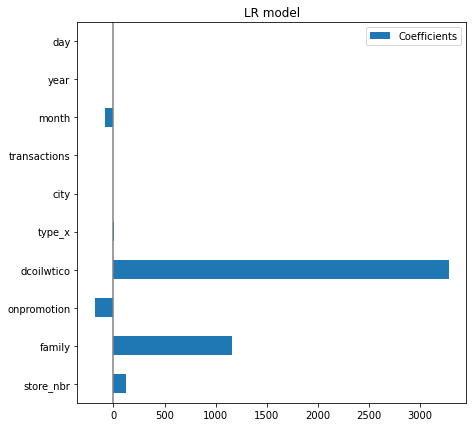

In [ ]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
   lr.coef_,
   columns=['Coefficients'], index=X.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('LR model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

###XGBoost Regressor

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                        n_estimators=500,
                        early_stopping_rounds=50,
                        objective='reg:linear',
                        max_depth=3,
                        learning_rate=0.01)

model.fit(X_train,y_train)  

[17:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01, n_estimators=500)

* Predictions

In [ ]:
preds_train=model.predict(X_train)
preds_test=model.predict(X_test)


* Evaluation Metrics

In [ ]:
print("MAPE:",mean_absolute_percentage_error(y_test,preds_test))
print("R-Square:",r2_score(y_test,preds_test))
print("RMSE:",rmse(y_test,preds_test))


MAPE: 1.647059989524972e+17
R-Square: 0.7062244644425417
RMSE: 592.822107362906


* Feature Importance

In [ ]:
model.feature_importances_

array([0.00801509, 0.3004763 , 0.07671839, 0.14753756, 0.00526999,
       0.        , 0.        , 0.25440618, 0.        , 0.20757645],
      dtype=float32)

* Feature Importance Plot

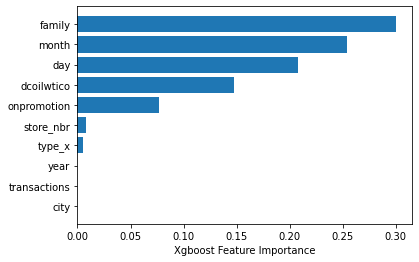

In [ ]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.show()